### In this notebook we are working in the HR dataset, Here we are predicting the employee will left or stay in the organigation.

In [1]:
# Importing some important libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import get_ipython
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Hr dataset
df= pd.read_csv('hr_data.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Data Visualization

In [3]:
# Seeing top 5 records
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Checking the in info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# No. of rows and columns
df.shape

(14999, 10)

In [6]:
# Sum of duplicate valve in the data
df.duplicated().sum()

3008

In [7]:
# Dropping the duplicate valve in the data
df.drop_duplicates(inplace=True)
df.shape # now we see the duplicate rows are removed

(11991, 10)

In [8]:
# Sum totel of null values in the data
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [9]:
# Statistics info of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,11991.0,0.629658,0.241070,0.09,0.48,0.66,0.82,1.0
last_evaluation,11991.0,0.716683,0.168343,0.36,0.57,0.72,0.86,1.0
number_project,11991.0,3.802852,1.163238,2.00,3.00,4.00,5.00,7.0
average_montly_hours,11991.0,200.473522,48.727813,96.00,157.00,200.00,243.00,310.0
time_spend_company,11991.0,3.364857,1.330240,2.00,3.00,3.00,4.00,10.0
Work_accident,11991.0,0.154282,0.361234,0.00,0.00,0.00,0.00,1.0
left,11991.0,0.166041,0.372133,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,11991.0,0.016929,0.129012,0.00,0.00,0.00,0.00,1.0


In [10]:
# Total no of unique values in the columns 
df.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
sales                     10
salary                     3
dtype: int64

In [11]:
# unique values in the number_columns
df['number_project'].unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

In [12]:
# Calculates and displays the count of each unique value in the 'number_project' column
df['number_project'].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

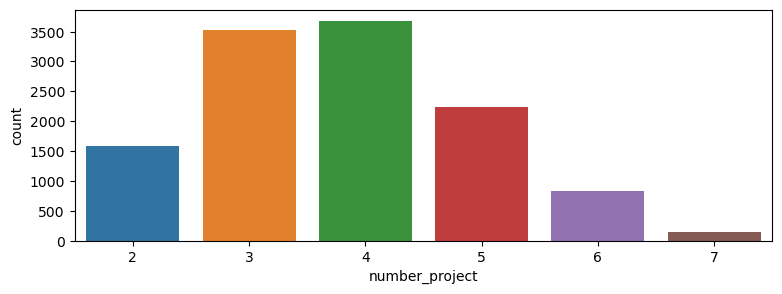

In [13]:
# plot the value on graph
plt.figure(figsize=(9,3))
sns.countplot('number_project', data=df)
plt.show()

In [14]:
# unique values in the number_columns
df['time_spend_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [15]:
# Calculates and displays the count of each unique value in the 'time_spend_company' column
df['time_spend_company'].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

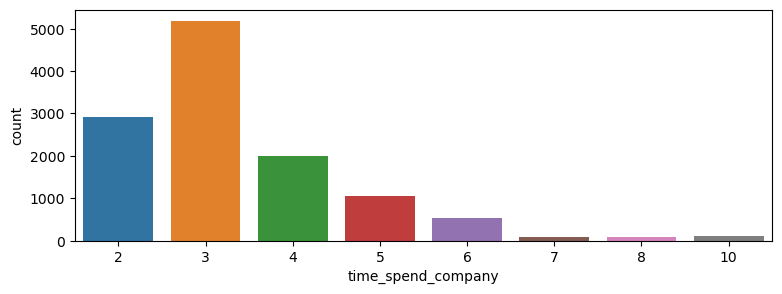

In [16]:
# plot the value on graph
plt.figure(figsize=(9,3))
sns.countplot('time_spend_company', data=df)
plt.show()

In [17]:
# unique values in the promotion_last_5years
df['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

In [18]:
# Calculates and displays the count of each unique value in the 'time_spend_company' column
df['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

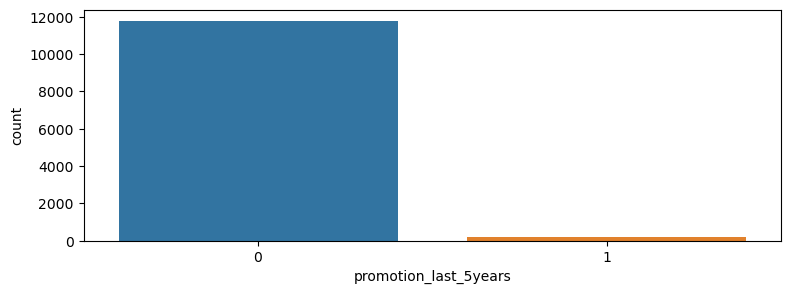

In [19]:
# plot the value on graph
plt.figure(figsize=(9,3))
sns.countplot('promotion_last_5years', data=df)
plt.show()

In [20]:
# unique values in the salary
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [21]:
# Calculates and displays the count of each unique value in the 'salary' column
df['salary'].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

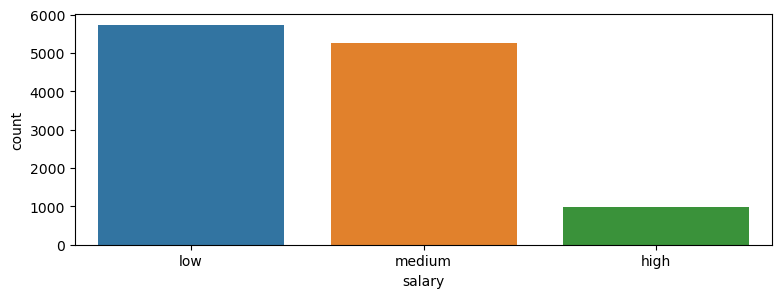

In [22]:
# plot the value on graph
plt.figure(figsize=(9,3))
sns.countplot('salary', data=df)
plt.show()

In [23]:
# With the help of for loop we get the unique values of these columns
for i in ['number_project','time_spend_company','promotion_last_5years','salary']:
    unique=df[i].unique()
    print(f"Unique values in {i} : {unique}")
    print()

Unique values in number_project : [2 5 7 6 4 3]

Unique values in time_spend_company : [ 3  6  4  5  2  8 10  7]

Unique values in promotion_last_5years : [0 1]

Unique values in salary : ['low' 'medium' 'high']



In [24]:
# With the help of for loop we calculates and displays the count of each unique value in the columns
for i in ['number_project','time_spend_company','promotion_last_5years','salary']:
    unique=df[i].value_counts()
    print(f"Unique values in {i} : {unique}")
    print()

Unique values in number_project : 4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

Unique values in time_spend_company : 3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

Unique values in promotion_last_5years : 0    11788
1      203
Name: promotion_last_5years, dtype: int64

Unique values in salary : low       5740
medium    5261
high       990
Name: salary, dtype: int64



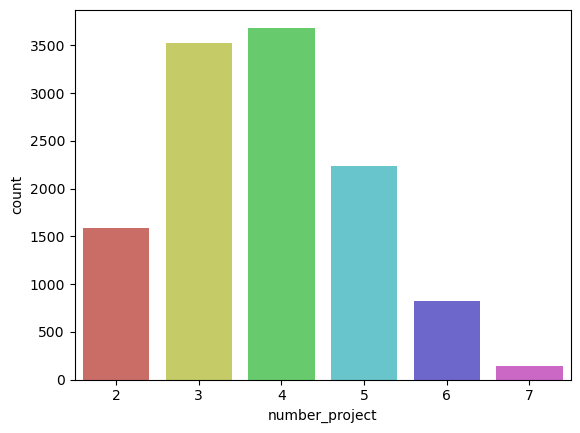

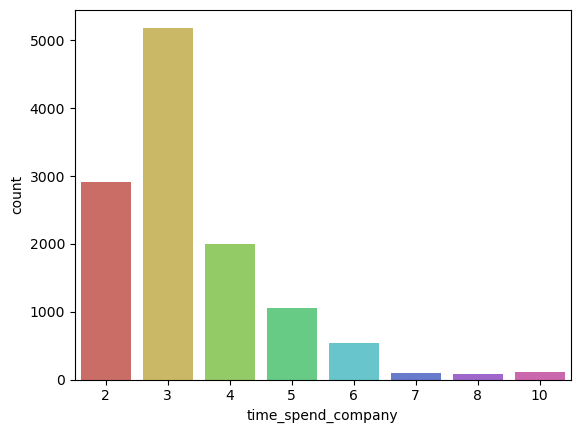

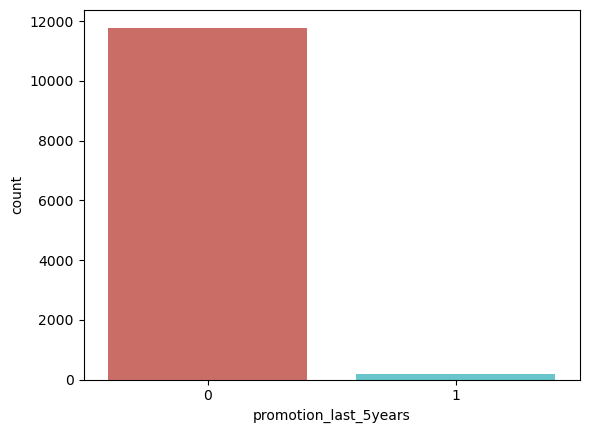

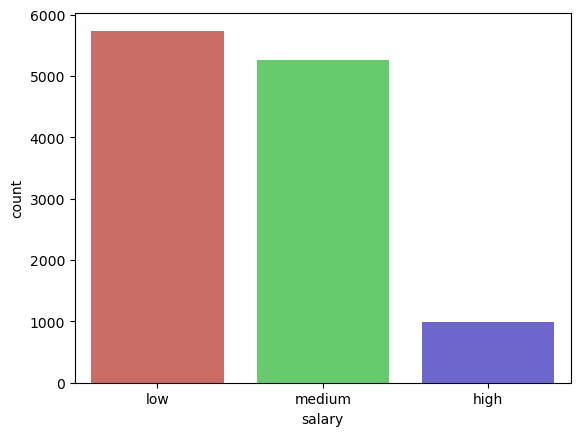

In [25]:
# With the help of for loop we plot all columns on graph
for i in ['number_project','time_spend_company','promotion_last_5years','salary']:
    sns.countplot(df[i],palette = 'hls')
    plt.show()

#### EDA

In [26]:
# Convert all cetogorical variable into numarical variable 
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=lr.fit_transform(df[i])

In [27]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,4,0
11996,0.74,0.95,5,266,10,0,0,1,4,0
11997,0.85,0.54,3,185,10,0,0,1,4,0
11998,0.33,0.65,3,172,10,0,0,1,5,0


In [28]:
# Taking all independent variable in X
X=df.drop('left',axis=1)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,4,0
11996,0.74,0.95,5,266,10,0,1,4,0
11997,0.85,0.54,3,185,10,0,1,4,0
11998,0.33,0.65,3,172,10,0,1,5,0


In [29]:
# Dependent column in y
y=df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

#### Model Fitting

In [30]:
# Pass data in our Logistic regression algorithm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Checking the accuracy
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test,logreg.predict(X_test))))

Logistic regression accuracy: 0.841


Text(0.5, 1.0, 'Logistic Regression')

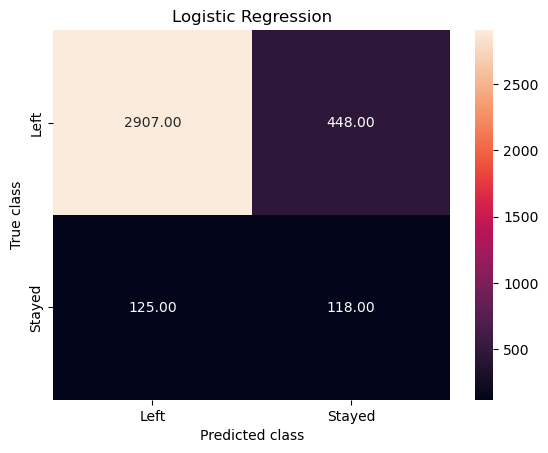

In [32]:
# Making confusrion matrix
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',
xticklabels = ["Left", "Stayed"] ,
yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

In [33]:
# Pass data in random forest algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
# Checking the accuracy
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test,rf.predict(X_test))))

Random Forest Accuracy: 0.987


Text(0.5, 1.0, 'Random Forest')

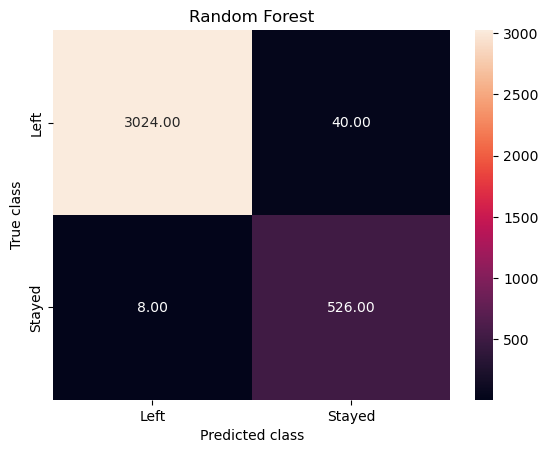

In [35]:
# Making confusrion matrix
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

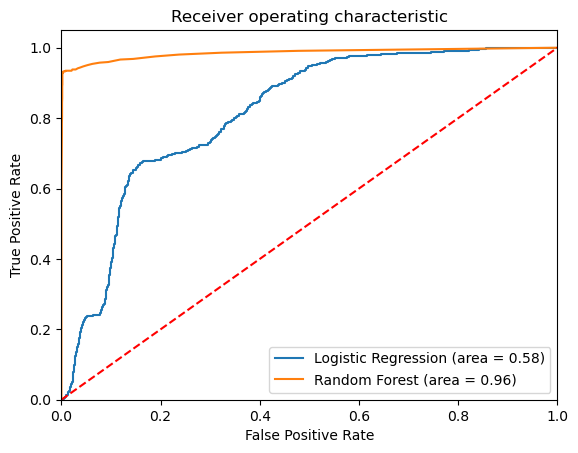

In [36]:
# Plotting ROC and AUC curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()